In [72]:
import netCDF4 as nc
import xarray as xr
import json

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

from shapely.geometry import Point
import geopandas as gpd

In [73]:
file_paths = []
for root, dirs, files in os.walk("data/E-OBS"):
    for file in files:
        if file.endswith(".nc"):
             file_paths.append(os.path.join(root, file).replace("\\", "/"))

file_paths

['data/E-OBS/fg_ens_mean_0.1deg_reg_2011-2022_v27.0e.nc',
 'data/E-OBS/hu_ens_mean_0.1deg_reg_2011-2022_v27.0e.nc',
 'data/E-OBS/qq_ens_mean_0.1deg_reg_2011-2022_v27.0e.nc',
 'data/E-OBS/rr_ens_mean_0.1deg_reg_2011-2022_v27.0e.nc',
 'data/E-OBS/tg_ens_mean_0.1deg_reg_2011-2022_v27.0e.nc',
 'data/E-OBS/tn_ens_mean_0.1deg_reg_2011-2022_v27.0e.nc',
 'data/E-OBS/tx_ens_mean_0.1deg_reg_2011-2022_v27.0e.nc']

In [74]:
codes_dict = {
    "tg": "Mean temperature",
    "tn": "Minimum temperature",
    "tx": "Maximum temperature",
    "rr": "Precipitation amount",
    "qq": "Surface shortwave downwelling radiation",
    "hu": "Relative humidity",
    "fg": "Wind gusts",
}

##  Mean temperature

In [75]:
VARIABLE  = "tg"

weather_data = nc.Dataset(file_paths[4])
weather_data.variables.keys()

dict_keys(['latitude', 'longitude', 'tg', 'time'])

In [76]:
lat = weather_data.variables['latitude'][:]
lon = weather_data.variables['longitude'][:]

time_index = 0
humidity_average = np.nanmean(weather_data.variables[VARIABLE][:], axis=0)



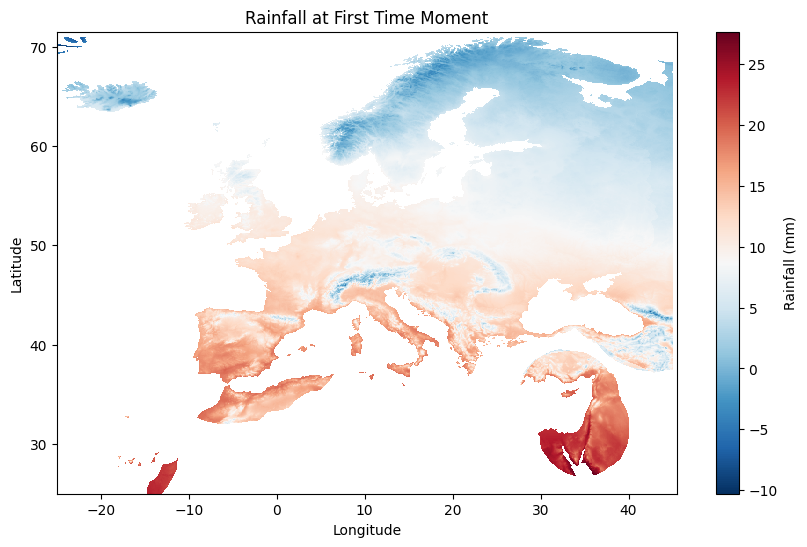

In [77]:
# for some moment in time, draw the map
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



# Create a plot with matplotlib
plt.figure(figsize=(10, 6))
plt.pcolormesh(lon, lat, humidity_average, cmap='RdBu_r')
plt.colorbar(label='Rainfall (mm)')
plt.title('Rainfall at First Time Moment')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Show the plot
plt.show()

weather_data.close()

In [78]:
# open the csv file with the cities
import csv

cities = []
with open('../FinalData/EuroStat (Meta) - Cities/city_codes.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=';')
    for row in reader:
        cities.append(row[0])

cities = cities[1:]
cities

['FI2',
 'FI20',
 'LI',
 'LI0',
 'LI00',
 'ES63',
 'ES64',
 'ITC2',
 'EL41',
 'EL62',
 'PT2',
 'PT20',
 'PT3',
 'PT30',
 'EL53',
 'ITF2',
 'BE34',
 'AT11',
 'FRY5',
 'ES23',
 'EL54',
 'EL42',
 'FRM',
 'FRM0',
 'CH07',
 'FRY2',
 'NL34',
 'AT34',
 'FRY1',
 'BE31',
 'NL23',
 'PT15',
 'NL13',
 'BE35',
 'MT',
 'MT0',
 'MT00',
 'ITH1',
 'DEB2',
 'ITH2',
 'AT32',
 'AT21',
 'ES13',
 'NL11',
 'DK05',
 'EL43',
 'LU',
 'LU0',
 'LU00',
 'NL12',
 'DE5',
 'DE50',
 'SK01',
 'HR05',
 'HR06',
 'LT01',
 'CH06',
 'DK02',
 'ITI2',
 'FRY4',
 'BE22',
 'CY',
 'CY0',
 'CY00',
 'PL52',
 'DEC',
 'DEC0',
 'SI04',
 'DE72',
 'DED5',
 'DE24',
 'CZ04',
 'BE33',
 'DE23',
 'NL42',
 'NL21',
 'BE24',
 'CZ08',
 'CH03',
 'ITH4',
 'CZ07',
 'BE25',
 'DE73',
 'ES53',
 'BE1',
 'BE10',
 'CZ01',
 'DE26',
 'HU12',
 'BE32',
 'NL31',
 'DED4',
 'ITI3',
 'DEB1',
 'ITC3',
 'BE23',
 'CH04',
 'DED2',
 'DE91',
 'CH01',
 'HU11',
 'FI1B',
 'NL1',
 'DE25',
 'DE6',
 'DE60',
 'DK01',
 'DE14',
 'BE21',
 'DE27',
 'FRF1',
 'AT13',
 'DEA4',
 'DE

In [79]:
geo_data = gpd.read_file('data/NUTS/NUTS_RG_01M_2021_4326.shp')
print(f"Current CRS: {geo_data.crs}")

#print a random row
print(geo_data.sample(1))

# group all regions of LEVL 2 by them touching
LEVL2 = geo_data[geo_data['LEVL_CODE'] == 2]
# find all regions that touch each other


# remove all the regions that do not have LEVL 2
geo_data = geo_data[geo_data['LEVL_CODE'] == 2]
# remove all the regions that do not have NUTS_ID   equal to something in cities
geo_data = geo_data[geo_data['NUTS_ID'].isin(cities)]






Current CRS: EPSG:4326
     NUTS_ID  LEVL_CODE CNTR_CODE NAME_LATN NUTS_NAME  MOUNT_TYPE  URBN_TYPE  \
1452   FRC22          3        FR      Jura      Jura         3.0          3   

      COAST_TYPE    FID                                           geometry  
1452           3  FRC22  MULTIPOLYGON (((5.69873 47.26500, 5.71832 47.2...  


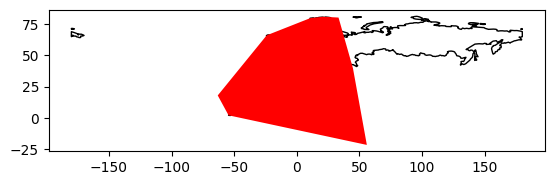

In [80]:
# This is a sample code and won't be executed here

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.wkt import loads

# Create a GeoSeries from the WKT
polygon_wkt = "POLYGON ((55.64671 -21.388846, 55.609141 -21.386713, -54.340337 2.153661, -54.476666 2.2141, -54.547836 2.270163, -54.600559 2.334688, -63.151187 18.062366, -63.146979 18.071214, -24.527669 65.50334, -24.524608 65.505897, -23.786503 66.063437, -23.134446 66.430276, 10.661758 79.755387, 10.70535 79.770527, 10.75635 79.780032, 11.304876 79.864028, 20.32948 80.832423, 20.345784 80.834023, 25.036191 80.673099, 33.145065 80.250123, 33.161584 80.248482, 33.236385 80.24022, 33.282683 80.228318, 33.287285 80.223724, 44.815867 39.646744, 55.834818 -21.161606, 55.835779 -21.18318, 55.808437 -21.333301, 55.79743 -21.349633, 55.774647 -21.364504, 55.64671 -21.388846))"
polygon = gpd.GeoSeries([loads(polygon_wkt)])

# Load a GeoDataFrame with the boundaries of all countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world with the EU highlighted
ax = world[world['continent'] == 'Europe'].plot(color='white', edgecolor='black')

# Overlay the polygon
polygon.plot(ax=ax, color='red')

plt.show()


C:\Users\sevcn\AppData\Local\Temp\ipykernel_7368\3588222009.py:36: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  regions = LEVL2.loc[component]
C:\Users\sevcn\AppData\Local\Temp\ipykernel_7368\3588222009.py:39: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  new_polygon = cascaded_union([region.geometry for _, region in regions.iterrows()])
C:\Users\sevcn\AppData\Local\Temp\ipykernel_7368\3588222009.py:36: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  regions = LEVL2.loc[component]
C:\Users\sevcn\AppData\Local\Temp\ipykernel_7368\3588222009.py:39: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  new_polygon = cascaded_union([region.geometry for _, region in regions.iterrows()])
C:\Users\sevcn\AppData\Local\Temp\ipykernel_7368\3588222009.py

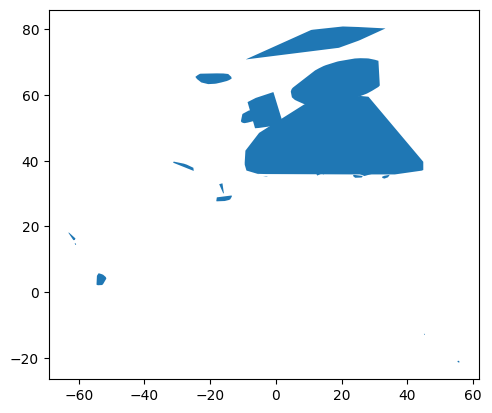

In [81]:
import networkx as nx
import geopandas as gpd



def regions_touch(region1, region2):
    """Return True if region1 and region2 touch, False otherwise."""
    return region1.geometry.touches(region2.geometry)


# Create a new graph
G = nx.Graph()

# Add a node for each region
for i, region in LEVL2.iterrows():
    G.add_node(i)

# Add an edge between any two regions that touch
for i, region1 in LEVL2.iterrows():
    for j, region2 in LEVL2.iterrows():
        if i != j and regions_touch(region1, region2):
            G.add_edge(i, j)


from shapely.ops import cascaded_union

# Find connected components
connected_components = list(nx.connected_components(G))

# Create a list to hold the new polygons
new_polygons = []

# For each connected component
for component in connected_components:
    # Select the rows of the GeoDataFrame that correspond to this component
    regions = LEVL2.loc[component]
    
    # Use unary_union to join the polygons in this component into a single polygon
    new_polygon = cascaded_union([region.geometry for _, region in regions.iterrows()])
    
    # Add the new polygon to the list
    new_polygons.append(new_polygon)

# Create a new GeoDataFrame from the list of new polygons
new_gdf = gpd.GeoDataFrame({'geometry': new_polygons})

# transform each one into a convex hall
for i, row in new_gdf.iterrows():
    new_gdf.at[i, 'geometry'] = row['geometry'].convex_hull

# Now, `new_gdf` is a GeoDataFrame where each row represents a group of regions that all touch each other

# Plot the new GeoDataFrame
new_gdf.plot()


def is_in_a_country(lat, long):
    point = Point(long, lat)
    for i, row in new_gdf.iterrows():
        if row['geometry'].contains(point):
            return True
    return False


In [83]:

def find_NUTS(lat, long):
    return_data = []
    point = Point(long, lat)
    for i, row in geo_data.iterrows():
        if row['geometry'].contains(point):
            return_data.append(row)
    if len(return_data) == 0:
        return None
    for row in return_data:
        if row['LEVL_CODE'] == 2:
            return row

In [99]:
from collections import defaultdict

rainfall_totals = defaultdict(float)
region_counts = defaultdict(int)

print(len(lat), len(lon))

for i in range(0,len(lat)):
    for j in range(len(lon)):
        NUTS_ID = is_in_a_country(lat[i], lon[j])
        if(NUTS_ID == False):
            continue
        # Get the NUTS region for this point
        region = find_NUTS(lat[i], lon[j])
        if(region is None):
            continue
        print(region,lat[i], lon[j])
        # check if value is masked, skip it
        if np.ma.is_masked(humidity_average[i, j]):
            continue
        

        # Add the rainfall value to the running total for this region
        rainfall_totals[region["NUTS_ID"]] += humidity_average[i, j]
        
        # Increment the count of points for this region
        region_counts[region["NUTS_ID"]] += 1
    print(i)

# Compute the average rainfall for each NUTS region
average_rainfall_per_region = {region: total / region_counts[region]
                               for region, total in rainfall_totals.items()}

# Now, 'average_rainfall_per_region' is a dictionary where the keys are NUTS regions and the values are the average rainfall for that region.

465 705
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
NUTS_ID                                                    ES70
LEVL_CODE                                                     2
CNTR_CODE                                                    ES
NAME_LATN                                              Canarias
NUTS_NAME                                              Canarias
MOUNT_TYPE                                                  0.0
URBN_TYPE                                                     0
COAST_TYPE                                                    0
FID                                                        ES70
geometry      MULTIPOLYGON (((-13.464231 29.128113, -13.4633...
Name: 279, dtype: object 27.74986060156052 -18.150139536403167
NUTS_ID                                                    ES70
LEVL_CODE                                                     2
CNTR_CODE                                                    ES
NAME_LATN                 

In [100]:
average_rainfall_per_region


{'ES70': 18.705968809909507,
 'PT30': 15.650520324707031,
 'CY00': 18.92661569335244,
 'MT00': 19.605026245117188,
 'EL42': 15.458120282491048,
 'PT15': 17.432959775129955,
 'EL62': 16.722751224742215,
 'PT17': 17.244411063916754,
 'ES53': 17.33318633659213,
 'EL54': 13.641173492778432,
 'EL53': 11.936669133373142,
 'EL41': 15.89337420463562,
 'FRM0': 14.453706146568381,
 'ITF2': 14.997532454403965,
 'ES23': 12.048272064753942,
 'ITI2': 13.855056710295624,
 'ES21': 12.981450667748085,
 'ITI3': 14.24275290637935,
 'ES13': 12.384096034935542,
 'ITC3': 12.936180098851521,
 'RO32': 12.002903211684455,
 'SI04': 9.773332157354245,
 'ITC2': 3.4669835567474365,
 'HR06': 12.240477204322815,
 'ITH4': 10.724374548248623,
 'ITH2': 7.547208199933381,
 'HR05': 12.808629417419434,
 'CH07': 6.778005585525975,
 'CH01': 5.412946969849392,
 'ITH1': 4.7065398308104305,
 'AT21': 7.280478570078101,
 'CH06': 6.448335750430238,
 'AT11': 11.604725505994713,
 'AT34': 6.27319407860438,
 'AT32': 6.030120917585458

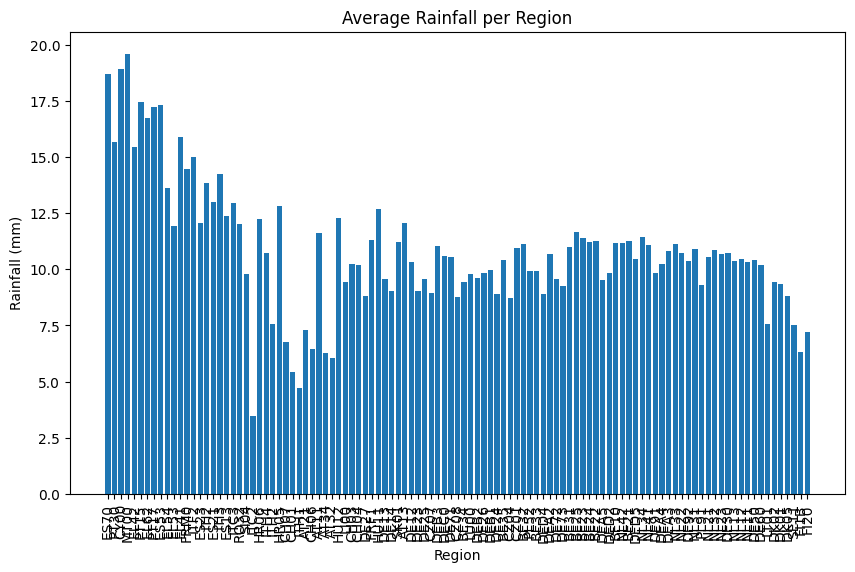

In [101]:
# plot the average rainfall per region
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a plot with matplotlib
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_rainfall_per_region)), list(average_rainfall_per_region.values()), align='center')
plt.xticks(range(len(average_rainfall_per_region)), list(average_rainfall_per_region.keys()), rotation='vertical')
plt.title('Average Rainfall per Region')
plt.xlabel('Region')
plt.ylabel('Rainfall (mm)')
plt.show()


In [105]:
# export the data to a json file
with open('data/rainfall.json', 'w', encoding='utf-8') as f:
    json.dump(average_rainfall_per_region, f, ensure_ascii=False, indent=4)
    

In [106]:
# open the cities file and get the cities and change each id to the name of the city
cities = []
with open('../FinalData/EuroStat (Meta) - Cities/city_codes.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=';')
    for row in reader:
        cities.append(row)

cities = cities[1:]
cities

[['FI2', 'Åland'],
 ['FI20', 'Åland'],
 ['LI', 'Liechtenstein'],
 ['LI0', 'Liechtenstein'],
 ['LI00', 'Liechtenstein'],
 ['ES63', 'Ciudad de Ceuta'],
 ['ES64', 'Ciudad de Melilla'],
 ['ITC2', "Valle d'Aosta/Vallée d'Aoste"],
 ['EL41', 'Voreio Aigaio'],
 ['EL62', 'Ionia Nisia'],
 ['PT2', 'Região Autónoma dos Açores (PT)'],
 ['PT20', 'Região Autónoma dos Açores (PT)'],
 ['PT3', 'Região Autónoma da Madeira (PT)'],
 ['PT30', 'Região Autónoma da Madeira (PT)'],
 ['EL53', 'Dytiki Makedonia'],
 ['ITF2', 'Molise'],
 ['BE34', 'Prov. Luxembourg (BE)'],
 ['AT11', 'Burgenland (AT)'],
 ['FRY5', 'Mayotte'],
 ['ES23', 'La Rioja'],
 ['EL54', 'Ipeiros'],
 ['EL42', 'Notio Aigaio'],
 ['FRM', 'Corse'],
 ['FRM0', 'Corse'],
 ['CH07', 'Ticino'],
 ['FRY2', 'Martinique'],
 ['NL34', 'Zeeland'],
 ['AT34', 'Vorarlberg'],
 ['FRY1', 'Guadeloupe'],
 ['BE31', 'Prov. Brabant wallon'],
 ['NL23', 'Flevoland'],
 ['PT15', 'Algarve'],
 ['NL13', 'Drenthe'],
 ['BE35', 'Prov. Namur'],
 ['MT', 'Malta'],
 ['MT0', 'Malta'],
 ['M

In [107]:
# replace the keys in the json file with the names of the cities
with open('data/rainfall.json', 'r', encoding='utf-8') as f:
    rainfall = json.load(f)

rainfall_cities = {}
for key, value in rainfall.items():
    for city in cities:
        if key == city[0]:
            rainfall_cities[city[1]] = value
            break

# export the data to a json file
with open('data/rainfall_cities.json', 'w', encoding='utf-8') as f:
    json.dump(rainfall_cities, f, ensure_ascii=False, indent=4)

        

In [110]:
# dump this also as a CSV file where we have two collums, NUTS Region and Average Temperature

with open('data/rainfall_cities.csv', 'w', encoding='utf-8') as f:
    writer = csv.writer(f, delimiter=';', lineterminator='\n')
    writer.writerow(["NUTS Region", "Average Rainfall"])
    for key, value in rainfall_cities.items():
        writer.writerow([key, value])

# open the json file with the cities
